In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = cv2.imread('/content/images.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
def plot_histogram(image, title='Histogram'):
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        color_hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(color_hist, color=color.lower())
    plt.xlim([0, 256])
    plt.show()

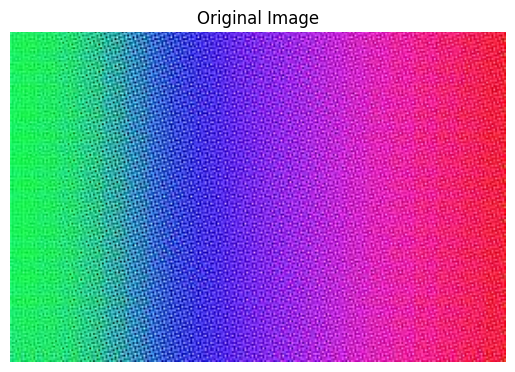

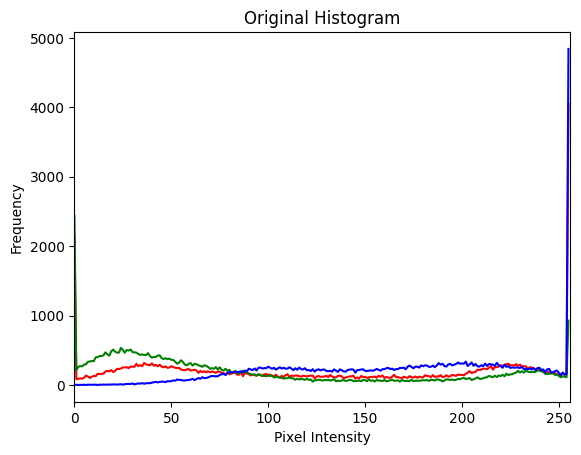

In [4]:
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

plot_histogram(image_rgb, title="Original Histogram")

In [5]:
def negative_transformation(image):
    return 255 - image

In [6]:
def log_transformation(image):
    # Ensure the image values are in the range 0-255 before applying log
    c = 255 / np.log(1 + np.max(image))
    log_img = c * (np.log(1 + image))
    return np.array(log_img, dtype=np.uint8)

In [7]:
def power_law_transformation(image, gamma=0.5):
    c = 255 / np.max(image) ** gamma
    power_img = c * (image ** gamma)
    return np.array(power_img, dtype=np.uint8)


In [8]:
negative_image = negative_transformation(image_rgb)
log_image = log_transformation(image_rgb)
power_image = power_law_transformation(image_rgb, gamma=0.5)


<ipython-input-6-cc9b55512b13>:4: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(1 + image))
<ipython-input-6-cc9b55512b13>:5: RuntimeWarning: invalid value encountered in cast
  return np.array(log_img, dtype=np.uint8)


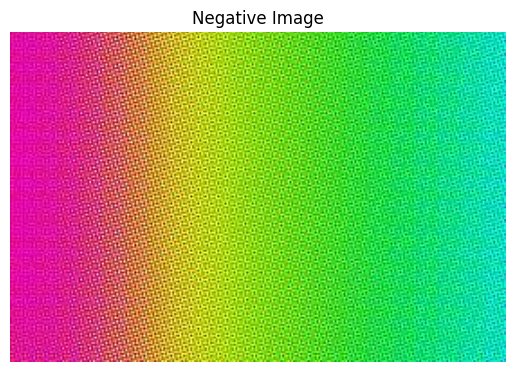

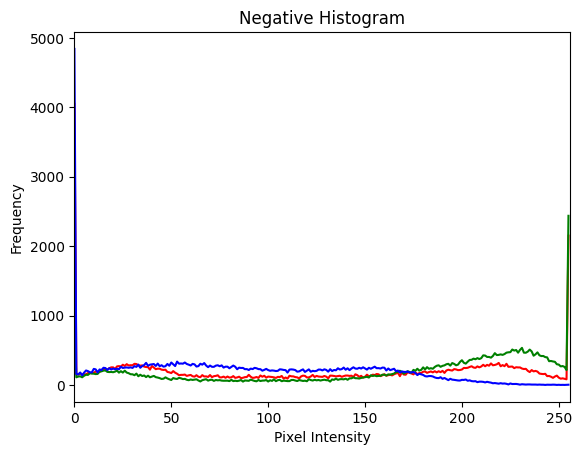

In [9]:
plt.imshow(negative_image)
plt.title('Negative Image')
plt.axis('off')
plt.show()
plot_histogram(negative_image, title="Negative Histogram")

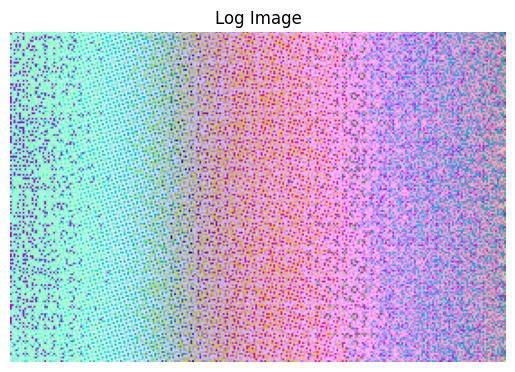

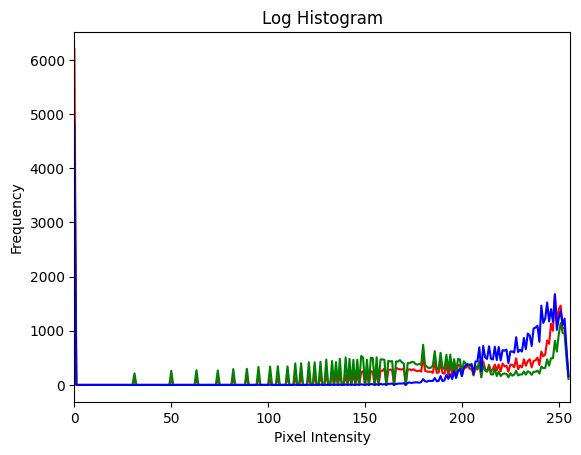

In [10]:
plt.imshow(log_image)
plt.title('Log Image')
plt.axis('off')
plt.show()
plot_histogram(log_image, title="Log Histogram")

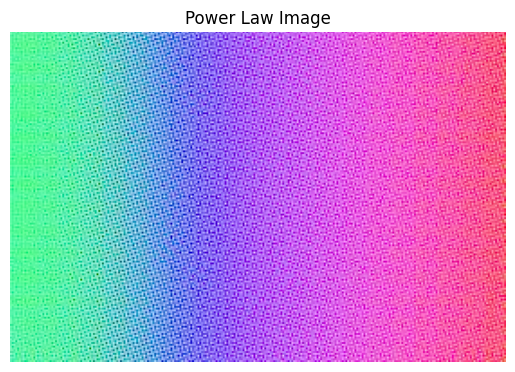

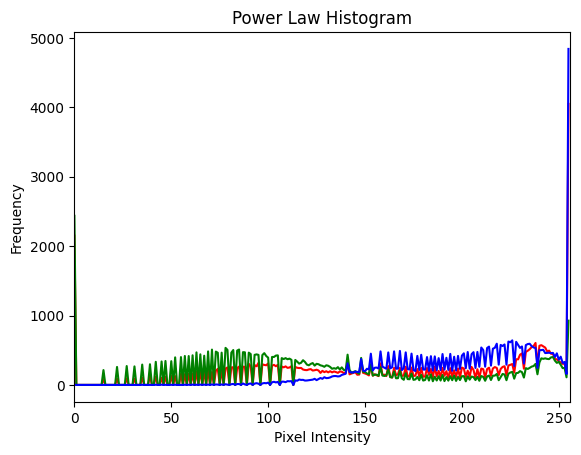

In [11]:
plt.imshow(power_image)
plt.title('Power Law Image')
plt.axis('off')
plt.show()
plot_histogram(power_image, title="Power Law Histogram")